In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


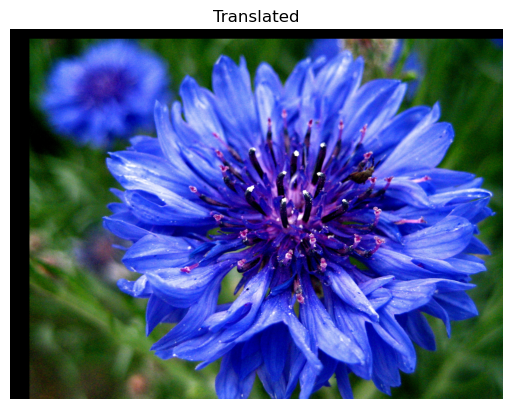

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/230159/Downloads/flower.jpg')
h, w = image.shape[:2]

tx = 100   # move right
ty = 50    # move down

T = np.float32([[1, 0, tx],
                [0, 1, ty]])

translated = cv2.warpAffine(image, T, (w, h))

plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.title("Translated")
plt.axis("off")
plt.show()

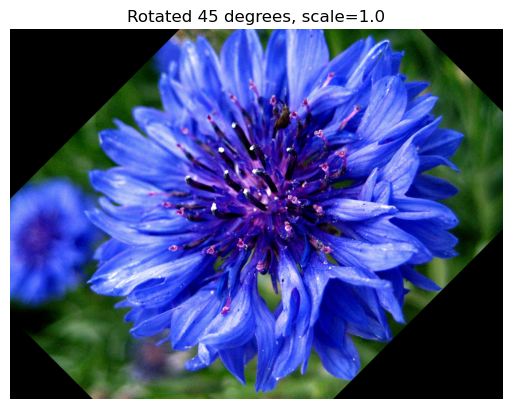

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/230159/Downloads/flower.jpg')
h, w = image.shape[:2]
center = (w // 2, h // 2)

angle = 45
scale = 1.0

R = cv2.getRotationMatrix2D(center, angle, scale)
rotated = cv2.warpAffine(image, R, (w, h))

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title(f"Rotated {angle} degrees, scale={scale}")
plt.axis("off")
plt.show()

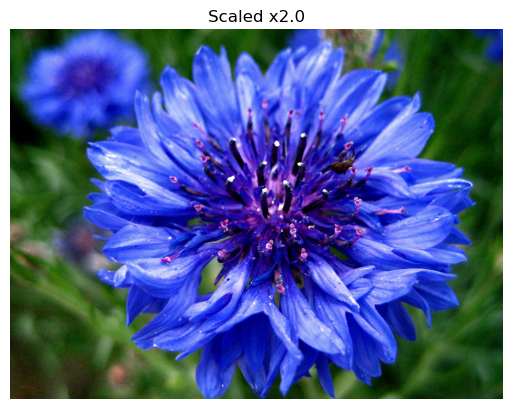

New size: (3800, 5066, 3)


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/230159/Downloads/flower.jpg')
h, w = image.shape[:2]

factor = 2.0  # try 0.5, 1.5, 5, 10, etc.

S = cv2.getRotationMatrix2D((0, 0), 0, factor)
scaled = cv2.warpAffine(image, S, (int(w*factor), int(h*factor)))

plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))
plt.title(f"Scaled x{factor}")
plt.axis("off")
plt.show()

print("New size:", scaled.shape)


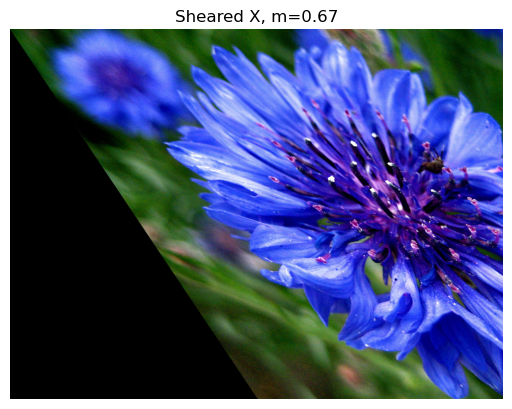

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/230159/Downloads/flower.jpg')
h, w = image.shape[:2]

m = 0.67  # try 0.2, 0.5, -0.5, etc.

Shx = np.float32([[1, m, 0],
                  [0, 1, 0]])

sheared_x = cv2.warpAffine(image, Shx, (w, h))

plt.imshow(cv2.cvtColor(sheared_x, cv2.COLOR_BGR2RGB))
plt.title(f"Sheared X, m={m}")
plt.axis("off")
plt.show()

In [9]:
m = 0.67

Shy = np.float32([[1, 0, 0],
                  [m, 1, 0]])

sheared_y = cv2.warpAffine(image, Shy, (w, h))

In this lab, I worked with affine transformations using python and OpenCV. I applied translation, rotation, scaling, and shearing to one image and observed how each transformation changes it. First, I used translation to move the image left, right, up, and down by changing the values of tx and ty. Then, I rotated the image by different angles and saw how its direction changes. After that, I scaled the image to make it bigger and smaller and noticed that large scaling can reduce image quality. Finally, I applied shearing, which made the image look tilted and distorted. This lab helped me understand how basic affine transformations work in practice